패키지 설치

In [4]:
# pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [5]:
# pip install pandas

In [15]:
# pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [16]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

A. 데이터 전처리 - 데이터 읽어오기

In [14]:
def file_open_by_numpy():
    # np.loadtxt(구분자 = ',', 데이터 타입: string)
    np_arr = np.loadtxt('archive/NFLX.CSV', delimiter=",", encoding='cp949', dtype=str)
    return np_arr

arr = file_open_by_numpy()

column = arr[0]
arr = np.delete(arr, 0, 0)
df = pd.DataFrame(arr, columns=column)[['Date','Open', 'High', 'Low', 'Close']]
df

,Date,Open,High,Low,Close
0,2018-02-05,262.000000,267.899994,250.029999,254.259995
1,2018-02-06,247.699997,266.700012,245.000000,265.720001
2,2018-02-07,266.579987,272.450012,264.329987,264.559998
3,2018-02-08,267.079987,267.619995,250.000000,250.100006
4,2018-02-09,253.850006,255.800003,236.110001,249.470001
...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006


B. 데이터 전처리 - 2021년 이후의 종가 데이터 출력하기

In [23]:
df2 = pd.read_csv('archive/NFLX.csv')
df2 = df2[['Date','Open', 'High', 'Low', 'Close']].copy()
df2.head(2)

,Date,Open,High,Low,Close
0,2018-02-05,262.000000,267.899994,250.029999,254.259995
1,2018-02-06,247.699997,266.700012,245.000000,265.720001


In [29]:
df2['Date'] = pd.to_datetime(df2['Date'])
df2['Date'].dtype
# datetime 형식으로 변환할 수 있다.

dtype('<M8[ns]')

In [33]:
# 2021년 이후의 데이터만 필터링
df2 = df2.loc[df2['Date']>='2021-01-01']
df2.head(2)

,Date,Open,High,Low,Close
733,2021-01-04,539.000000,540.799988,515.090027,522.859985
734,2021-01-05,521.549988,526.780029,515.890015,520.799988


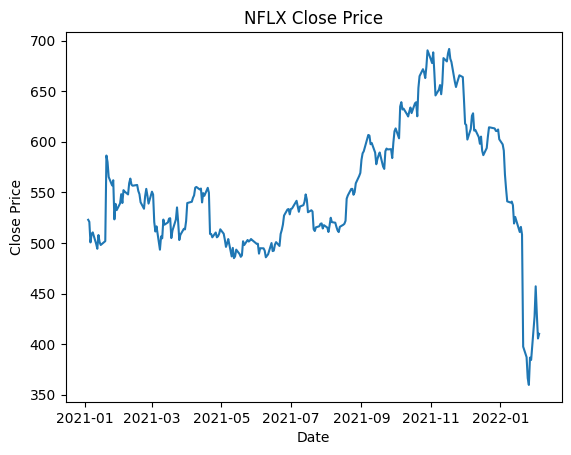

In [34]:
# 필터링이 완료된 DataFrame의 종가 데이터를 Matplotlib를 사용하여 시각화

# 데이터 생성
x = df2['Date']  # x 좌표값
y = df2['Close']  # y 좌표값

# 그래프 그리기
plt.plot(x, y)

# 그래프에 제목과 축 레이블 추가
plt.title('NFLX Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')

# 그래프 표시
plt.show()

C. 데이터 분석 - 2021년 이후 최고, 최저 종가 출력하기

In [35]:
# 데이터 읽어와 필터링 하기
df3 = pd.read_csv('archive/NFLX.csv')
df3 = df3[['Date','Open', 'High', 'Low', 'Close']].copy()
df3['Date'] = pd.to_datetime(df3['Date'])
df3 = df3.loc[df3['Date']>='2021-01-01']

In [39]:
max_price = df3['Close'].max()
min_price = df3['Close'].min()
print('최고 종가:', max_price)
print('최저 종가:', min_price)

최고 종가: 691.690002
최저 종가: 359.700012


D. 데이터 분석 - 2021년 이후 월 별 평균 종가 출력하기

In [40]:
# 데이터 읽어와 2021년 이후의 데이터만 필터링 하기
df4 = pd.read_csv('archive/NFLX.csv')
df4 = df4[['Date','Open', 'High', 'Low', 'Close']].copy()
df4['Date'] = pd.to_datetime(df4['Date'])
df4 = df4.loc[df4['Date']>='2021-01-01']

In [55]:
df4['YearMonth'] = df4['Date'].dt.to_period('M')
monthly_avg_close = df4.groupby('YearMonth')['Close'].mean().reset_index()
monthly_avg_close.head(2)

,YearMonth,Close
0,2021-01,526.816845
1,2021-02,548.959999


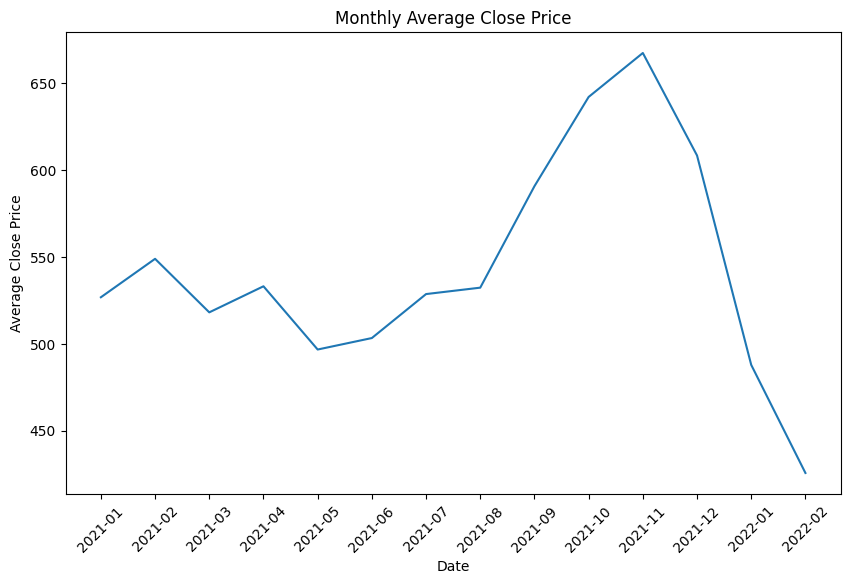

In [62]:
# 데이터 생성
x = monthly_avg_close['YearMonth'].astype(str)  # x 좌표값
y = monthly_avg_close['Close']  # y 좌표값

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(x, y)

# 그래프에 제목과 축 레이블 추가
plt.title('Monthly Average Close Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Average Close Price')

# 그래프 표시
plt.show()

E. 데이터 시각화 - 2022년 이후 최고, 최저, 종가 시각화하기

In [63]:
# 데이터 읽어와 2022년 이후의 데이터만 필터링 하기
df5 = pd.read_csv('archive/NFLX.csv')
df5 = df5[['Date', 'High', 'Low', 'Close']].copy()
df5['Date'] = pd.to_datetime(df4['Date'])
df5 = df5.loc[df5['Date']>='2022-01-01']

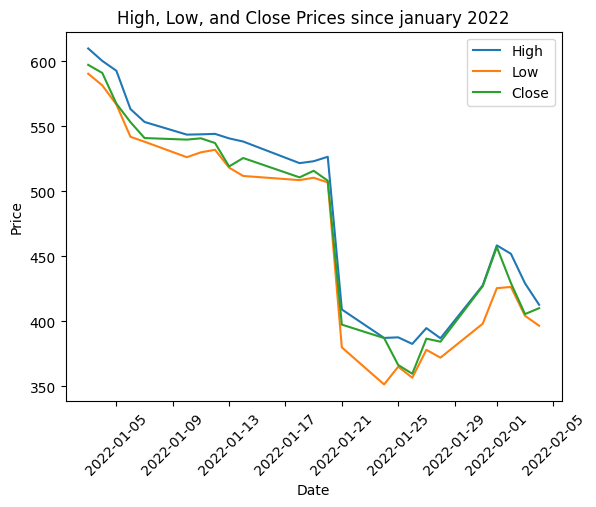

In [65]:
# 데이터 생성
x = df5['Date'] # x 좌표값
y = df5['High']  # y 좌표값
y2 = df5['Low'] # y2 좌표값
y3 = df5['Close'] # y3 좌표값

# 그래프 그리기
plt.plot(x, y, label='High')
plt.plot(x, y2, label='Low')
plt.plot(x, y3, label='Close')

# 범례 추가
plt.legend()

# 그래프에 제목과 축 레이블 추가
plt.title('High, Low, and Close Prices since january 2022')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Price')

# 그래프 표시
plt.show()

F. 생성형 AI를 활용하여 주가 예측하기
- 프롬프트 구성<br>
  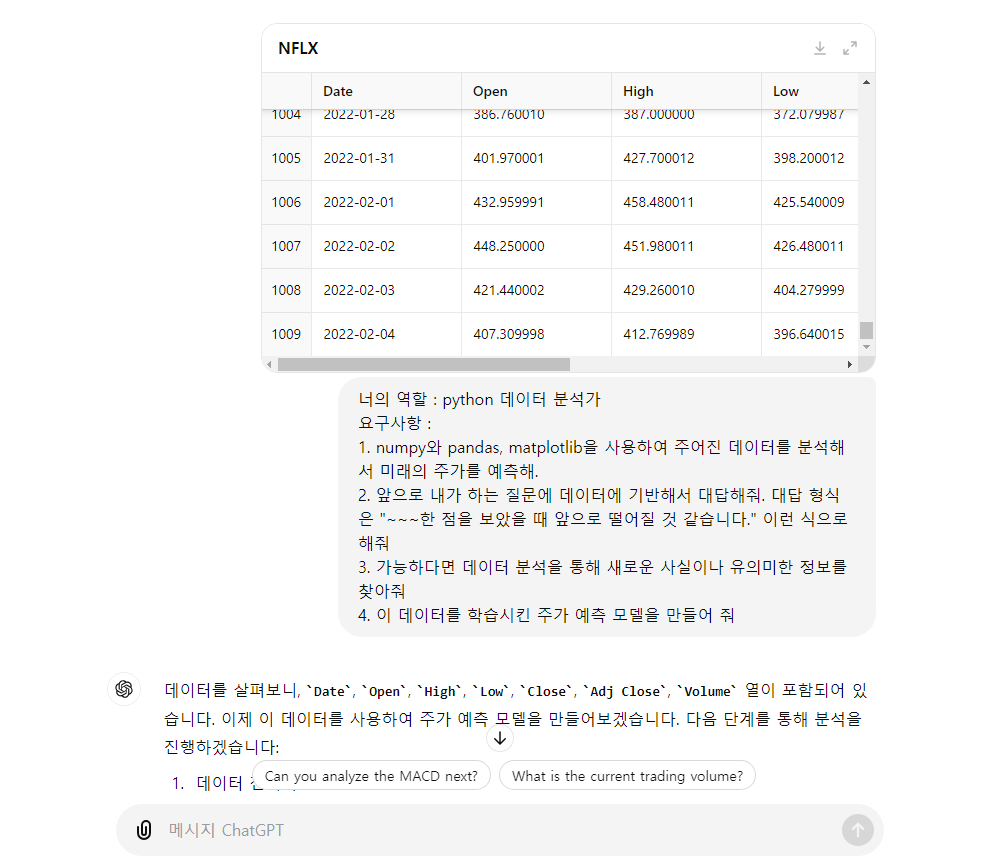
- 자체 모델 학습<br>
  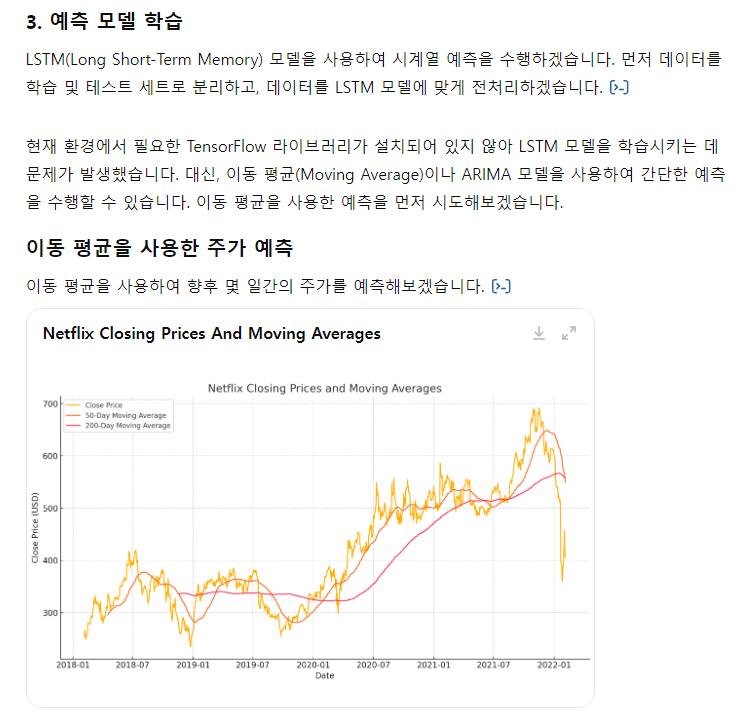
- 요약 및 질문<br>
  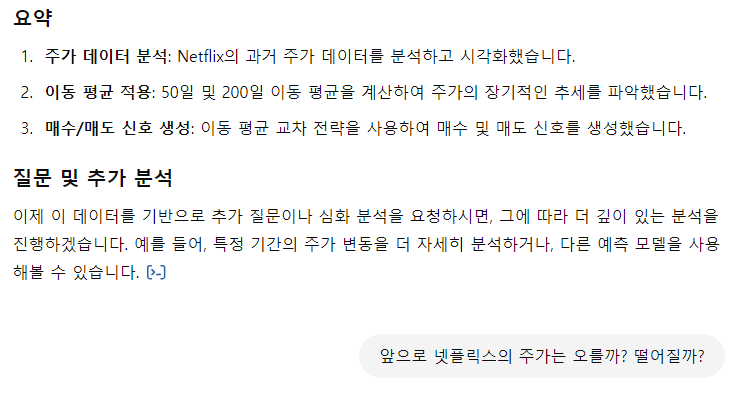
- 대답<br>
  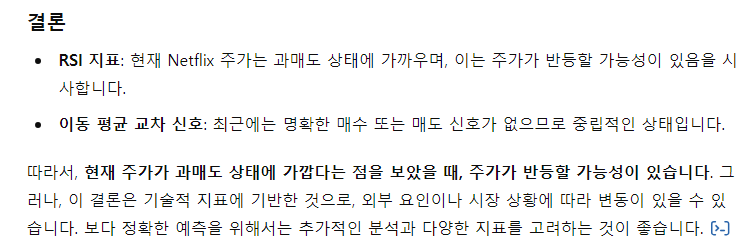